# Первичный анализ и предобработка данных с Pandas

In [32]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

## Структура данных

| Название колонки | Краткое описание |
| -----------------| ---------------- |
| company | компания производитель |
| bar_name | название шоколадного батончика |
| company | компания производитель |
| ref | номер |
| rew_date | дата оценки |
| percent | процент какао бобов |
| company_loc | местонахождение компании |
| rate | рейтинг |
| bean_dtype | тип какао бобов |
| bean_orig | страна происхождения |

## Численные атрибуты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
best_bar = pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

Импортрованные данные выглядят следующим образом

In [3]:
best_bar.head()

,company,bar_name,ref,rew_date,percent,company_loc,rate,bean_dtype,bean_orig
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Оставим только только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [4]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.head() 

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20.
На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормалього (гауссова). Поэтому графики плотности еще называют ядерной окенки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

In [5]:
print('Рейтинг батончика находится в диапазоне от 0 до 5? ', best_bar[(best_bar.rate < 0) | (best_bar.rate > 5)]['rate'].count() == 0)

Рейтинг батончика находится в диапазоне от 0 до 5?  True


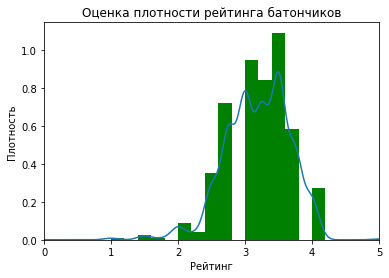

In [6]:
best_bar['rate'].plot(kind='hist',color='g', bins=20, density=True)
best_bar['rate'].plot(kind='kde')
plt.title('Оценка плотности рейтинга батончиков')
plt.xlabel('Рейтинг')
plt.ylabel('Плотность')
plt.xlim(0,5)
plt.show()

Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Шистограмму для такого типа построить не получиться.

In [7]:
print(f"Тип процента какао бобов: {best_bar['percent'].dtype}")

Тип процента какао бобов: object


Необходимо преобразовать данный тип в float с помощью функции apply. Причем сначала необходимо убрать знак '%' в конце каждого элемента, а затем преобразовать в тип данных с плавающей точкой. Функция apply проходит по всем значениям данных и применяет указанную функцию.

In [8]:
best_bar['percent'] = best_bar['percent'].apply(lambda percent: float(percent[:-1]))

In [9]:
print(f"Тип процента какао бобов после преобразования: {best_bar['percent'].dtype}")

Тип процента какао бобов после преобразования: float64


Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

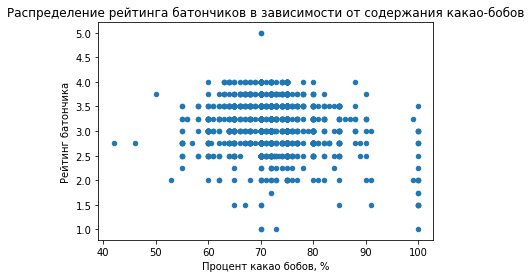

In [10]:
best_bar.plot(kind='scatter', x='percent', y='rate')
plt.title('Распределение рейтинга батончиков в зависимости от содержания какао-бобов')
plt.xlabel('Процент какао бобов, %')
plt.ylabel('Рейтинг батончика')
plt.show()

Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

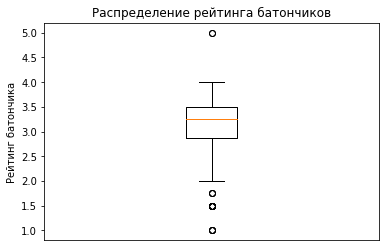

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: rate, dtype: float64

In [11]:
plt.boxplot(x = best_bar['rate'])
plt.title('Распределение рейтинга батончиков')
plt.ylabel('Рейтинг батончика')
plt.xticks([])
plt.show()
best_bar['rate'].describe()

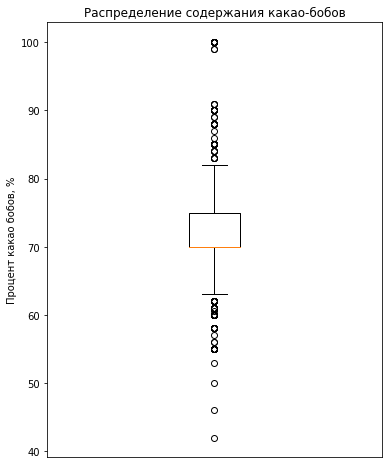

count    1795.000000
mean       71.698329
std         6.323118
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       100.000000
Name: percent, dtype: float64

In [12]:
plt.figure(figsize=(6, 8))
plt.boxplot(x = best_bar['percent'])
plt.title('Распределение содержания какао-бобов')
plt.ylabel('Процент какао бобов, %')
plt.xticks([])
plt.show()
best_bar['percent'].describe()

## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удасться, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

In [13]:
best_bar['company_loc'].value_counts().head()

U.S.A.    764
France    156
Canada    125
U.K.       96
Italy      63
Name: company_loc, dtype: int64

In [14]:
best_bar['bean_orig'].value_counts().head()

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
Name: bean_orig, dtype: int64

После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

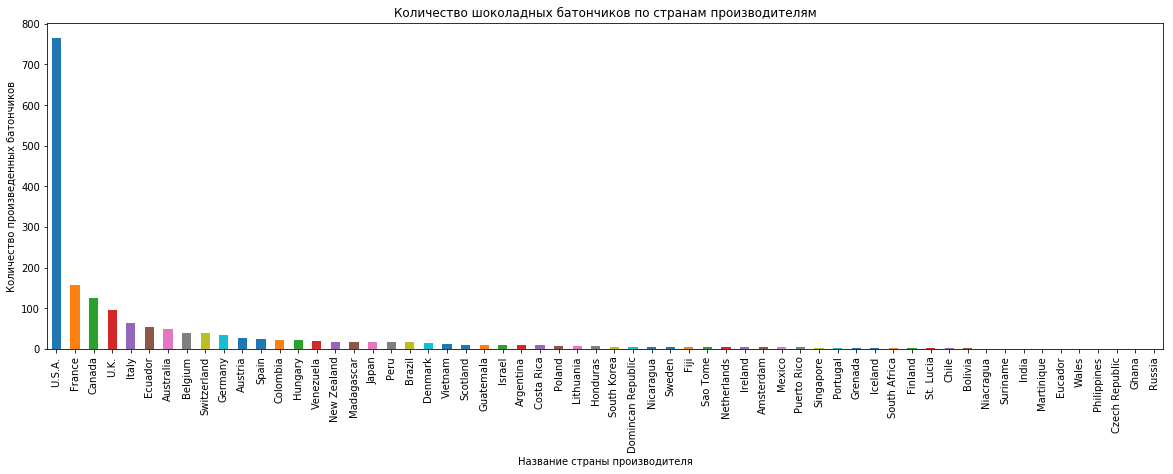

In [15]:
plt.figure(figsize=(20, 6))
best_bar['company_loc'].value_counts().plot(kind='bar')
plt.title('Количество шоколадных батончиков по странам производителям')
plt.ylabel('Количество произведенных батончиков')
plt.xlabel('Название страны производителя')
plt.show()

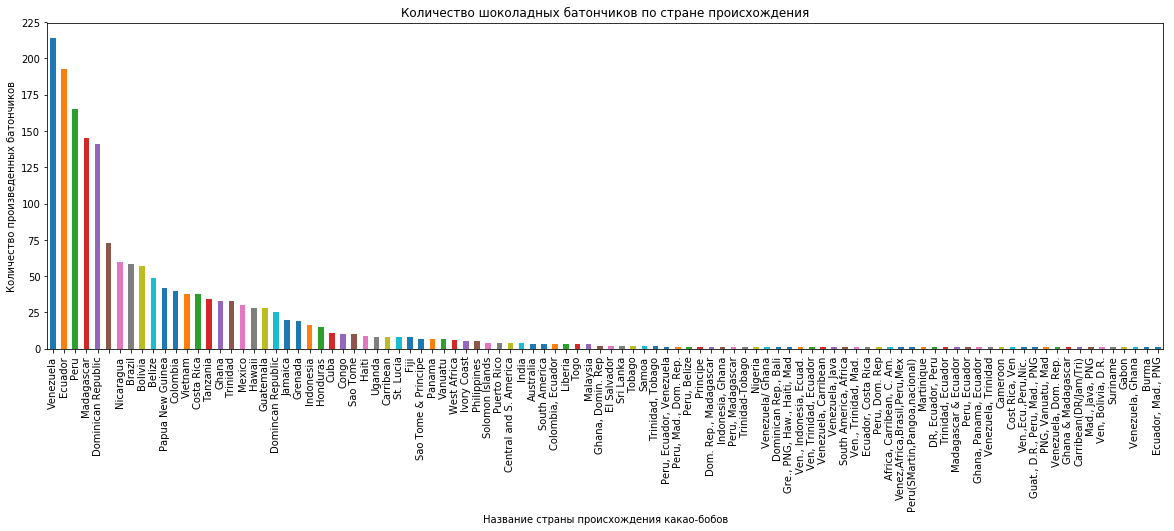

In [16]:
plt.figure(figsize=(20, 6))
best_bar['bean_orig'].value_counts().plot(kind='bar')
plt.title('Количество шоколадных батончиков по стране происхождения')
plt.ylabel('Количество произведенных батончиков')
plt.xlabel('Название страны происхождения какао-бобов')
plt.show()

По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis', где 0 - удалять по строкам (объектам), 1 - удалять по столбцам, 'how', где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.  

In [17]:
print(f"Пустые объекты удалены? {best_bar.dropna(axis=0, how='all')['bean_orig'].count() < best_bar['bean_orig'].count()}")

Пустые объекты удалены? False


Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [18]:
best_bar['bean_orig'].unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

In [19]:
print(f"Количество уникальных записей: {best_bar['bean_orig'].unique().size}")

Количество уникальных записей: 101


Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

In [20]:
best_bar = best_bar[best_bar['bean_orig'] != '\xa0']

In [21]:
print(f"Количество уникальных записей после удаления: {best_bar['bean_orig'].unique().size}")

Количество уникальных записей после удаления: 100


Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

In [22]:
complex_orig = best_bar['bean_orig'].value_counts()[best_bar['bean_orig'].value_counts() <= 5].index.tolist()

In [23]:
best_bar['bean_orig'] = best_bar['bean_orig'].replace(complex_orig, 'complex')

In [24]:
print(f"Количество затронутых значений: {best_bar['bean_orig'].value_counts()['complex']}")

Количество затронутых значений: 101


Постройте круговую гистограмму распределения для стран происзводителей какао бобов с помощью функции pie().

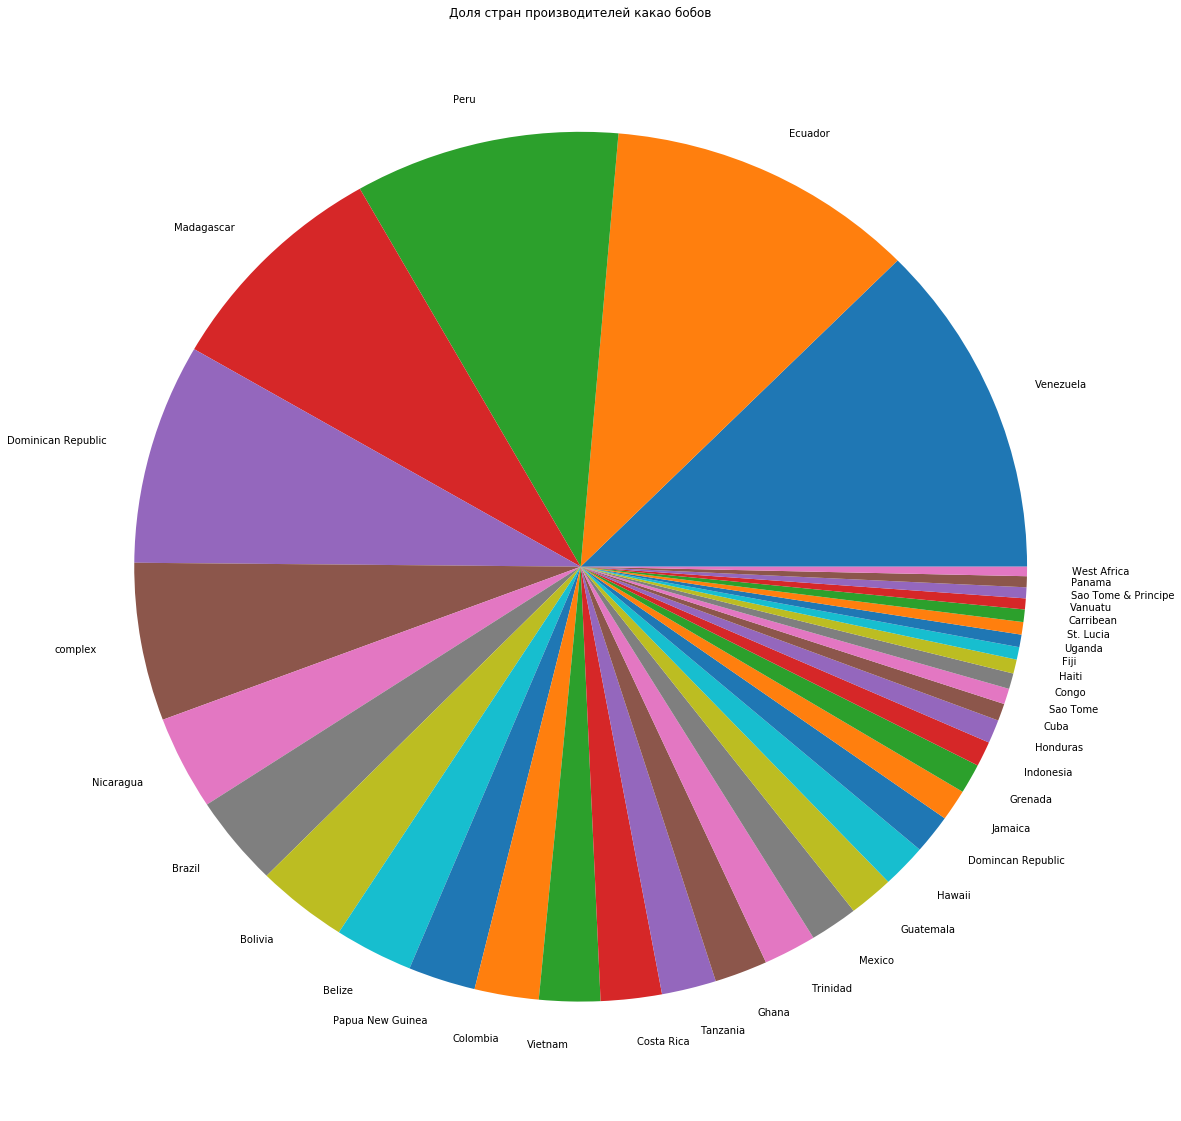

In [25]:
plt.figure(figsize=(20,20))
best_bar['bean_orig'].value_counts().plot(kind='pie')
plt.title('Доля стран производителей какао бобов')
plt.ylabel('')
plt.show()

## Попарные графики распределений

In [26]:
from sklearn import preprocessing
from seaborn import pairplot

Построить попарные распределения для всех признаков.

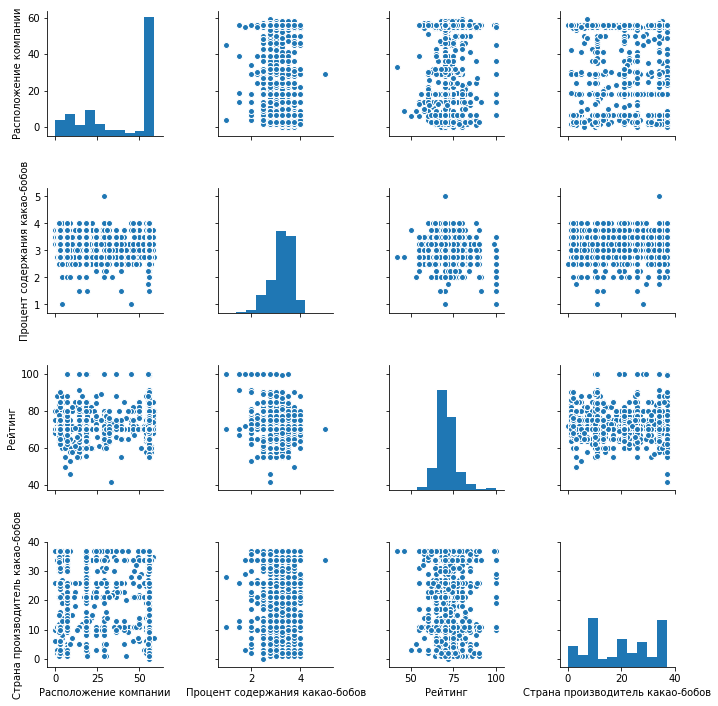

In [27]:
pairplot(pd.DataFrame([preprocessing.LabelEncoder().fit_transform(best_bar['company_loc']), best_bar['rate'], best_bar['percent'], preprocessing.LabelEncoder().fit_transform(best_bar['bean_orig'].fillna('0'))], index=['Расположение компании', 'Процент содержания какао-бобов', 'Рейтинг', 'Страна производитель какао-бобов']).transpose())
plt.show()

Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [28]:
for country in best_bar.groupby(['bean_orig']).mean().sort_values(by='rate', ascending=False).index[0:3].tolist():
    print(country)

Haiti
Honduras
Congo


In [29]:
for country in best_bar.groupby(['bean_orig']).median().sort_values(by='rate', ascending=False).index[0:3].tolist():
    print(country)

Honduras
Sao Tome & Principe
Brazil


Определите, где производят лучшие батончики, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения.

In [30]:
for country in best_bar.groupby(['company_loc']).mean().sort_values(by='rate', ascending=False).index[0:3].tolist():
    print(country)

Chile
Amsterdam
Netherlands


In [31]:
for country in best_bar.groupby(['company_loc']).median().sort_values(by='rate', ascending=False).index[0:3].tolist():
    print(country)

Chile
Amsterdam
Iceland


## Работу выполнил
---
Студент группы **РИМ-181226**

Кабанов Евгений Алексеевич